In [20]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c

from PIL.GifImagePlugin import getdata

In [21]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [22]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [23]:
nm = 1e-9
um = 1e-6


In [24]:
icApi = lumapi.INTERCONNECT()

In [25]:
icApi.switchtolayout()
icApi.deleteall()

Adding devices

In [26]:
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')


In [27]:
delta = ((1550e-9)**2)/(4.3455*1e-9)
#waveguides
#to do: set the wavelengths properly to the waveguides
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', 100*um)
icApi.set('effective index 1', 2.355)
icApi.set('group index 1', 4.355)


icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg2')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', (100*um +delta))
icApi.set('effective index 1', 2.355)
icApi.set('group index 1', 4.355)



In [28]:
print(((1550e-9)**2)/(4.3455*1e-9)/um)

552.8707858704406


In [29]:
#Y branches
icApi.addelement('Waveguide Y Branch')
icApi.set('name', 'yb1')
'''
icApi.addelement('ebeam_y_1550')
icApi.set('name', 'yb1')
'''
icApi.addelement('Waveguide Y Branch')
icApi.set('name', 'yb2')
icApi.rotateelement('yb2')
icApi.rotateelement('yb2')

In [30]:
#positions
icApi.setposition('ona1',-20,-200)
icApi.setposition('wg1',0,0)
icApi.setposition('wg2',0,150)
icApi.setposition('yb1',-250,75)
icApi.setposition('yb2',250,75)

In [31]:
#conections
icApi.connect('ona1','output', 'yb1', 'port 1')

icApi.connect('yb1', 'port 2', 'wg1', 'port 1')
icApi.connect('yb1', 'port 3', 'wg2', 'port 1')
'''
icApi.connect('ona1','output', 'yb1', 'opt_a1')

icApi.connect('yb1', 'opt_b1', 'wg1', 'port 1')
icApi.connect('yb1', 'opt_b2', 'wg2', 'port 1')
'''
icApi.connect('wg1', 'port 2', 'yb2', 'port 3')
icApi.connect('wg2', 'port 2', 'yb2', 'port 2')

icApi.connect('yb2', 'port 1', 'ona1', 'input 1')


1.0

In [32]:
icApi.switchtolayout()
icApi.select('ona1')
icApi.set('number of points', 1000)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

In [33]:
icApi.run()

(1545.0, 1555.0)

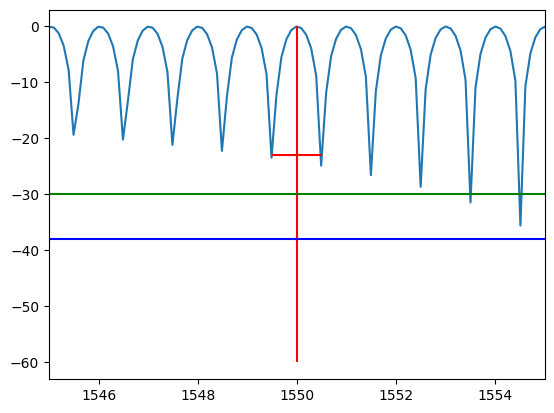

In [39]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
#print(data)
#print((data['wavelength']))

plt.plot(data['wavelength']/nm, data['TE gain (dB)'])
#plt.plot(data['wavelength']/nm, data['mode 1 gain (dB)']) #for S parameters devices
plt.vlines(1550,ymin=-60,ymax=0, color='r')
plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-38,xmin=1545,xmax=1555, color='b')
plt.hlines(-30,xmin=1540,xmax=1560, color='g')
plt.xlim(1545, 1555)
#plt.xlim(1540, 1560)

In [35]:
#icApi.close()